<a href="https://colab.research.google.com/github/hellen2021/KNN-and-Naive-Bayes-Classifier/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbors Classifier

## 1. Defining the question
Implement k Nearest Neighbor classifier(KNN) for the given dataset, then later on apply the optimization techniques in order to compare the performance
## 2. Defining the metric of success
This exercise will be a success, if the model achieves a performance of atleast 70%
## 3. Understanding the context
## 4. Defining the experimental designs

*   Load the dataset
*   Preview and explore the dataset
*   Data cleaning
*   Modelling using KNN classifier for different test sizes
*   Evaluation of the model
*   List item


## 6. Challenging the solution
Apply optimization techniques and compare the performances
## 7. Conclusion

## Import necessary libaries

In [2]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


## Loading the datset

In [3]:
# Loading
df_train = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')
df_test = pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')

## Preview and explore the dataset

### Preview

In [4]:
# train set
# top 5 records
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# bottom 5 records
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# test set
# top 5
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# bottom 5 records
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### Explore

In [8]:
# size/shape
print('Train set consist of',df_train.shape[0], 'rows', 'and',df_train.shape[1], 'columns')

Train set consist of 891 rows and 12 columns


In [9]:
# size/shape
print('Train set consist of',df_test.shape[0], 'rows', 'and',df_test.shape[1], 'columns')

Train set consist of 418 rows and 11 columns


In [10]:
# info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# completeness
# missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

3 variables: age, cabin and embarked have missing values

Cabin has almost all missing values(687 out of 891), so we can drop that variable completely,

## Exploratory data analysis
### Univariate Analysis


In [22]:
# describe
df_train.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.053060,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.231443,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


we can see that the maximum age of the passengers was 80 yrs and the minimum is about 5 months, and the mean age of the passengers is 29.

The maximum about of fare is about 512 and the minimum fare is 0: might be the children below certain age were not being charged

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


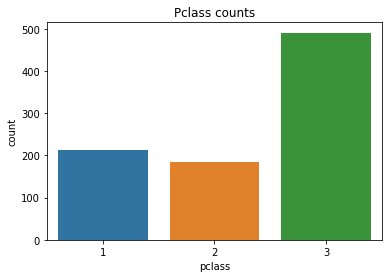

In [23]:
# bar chart to show the pclass count
sns.countplot('pclass', data = df_train)
plt.title('Pclass counts')
plt.show()

Most passengers fall into the passenger class 3.

Next is passenger 1 the then least is class 2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


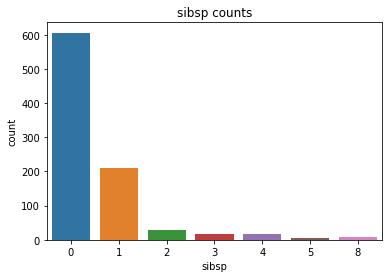

In [24]:
# sibsp
sns.countplot('sibsp', data = df_train)
plt.title('sibsp counts')
plt.show()

Most passengers did not have relatives in terms of sibling/spouse.

About 200 of the passengers had one relative in terms of sibling/spouse

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


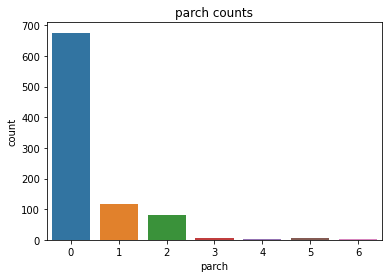

In [25]:
# parch
sns.countplot('parch', data = df_train)
plt.title('parch counts')
plt.show()

Most passengers also did not have relatives onboard in terms of parent/children.

About 100 of the passengers each had one relative in terms of parent/children

## Data Cleaning

#### Variables description
*   Survived - This variable is obviously relevant.
*   Pclass - passenger's class on the boat
*   Age - passenger's age 
*   SibSp -  number of relatives on the boat (that are siblings or a spouse)
*   Parch - number of relatives on the boat (that are children or parents) 
*   Fare - fare a person paid
*   Embarked - person's point of embarkation 
*   Person's name, ticket number, and passenger ID number? They're irrelavant for predicting survivability. 



In [12]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# validity
# drop all the variables that aren't relevant for predicting survival
df_train.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace =True)

In [14]:
# fixing the column names
# cange to lower case(preferred), and remove any white spaces if any
df_train.columns = df_train.columns.str.lower().str.replace(" ", "_")

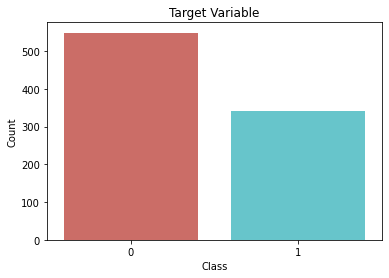

In [15]:
# Checking that our target variable is binary
# Since we are building a model to predict survival of passangers from the Titanic, 
# our target is going to be "Survived" variable from the titanic dataframe. 
# To make sure that it's a binary variable, let's use Seaborn's countplot() function.
# 
sns.countplot(x='survived',data=df_train, palette='hls')
plt.title('Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
# from the output we see that the Survived variable is binary (0 - did not survive / 1 - survived)

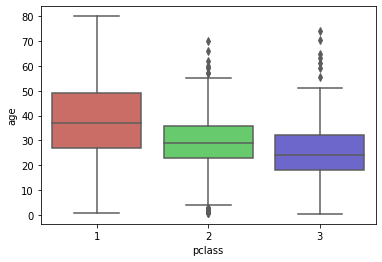

In [16]:
# Imputing missing values
# ---
# Let's look at how passenger age is related to their class as a passenger on the boat.
# 
sns.boxplot(x='pclass', y='age', data=df_train, palette='hls')
plt.show()

In [17]:
 # We could say that the younger a passenger is, the more likely it is for them to be in 3rd class. 
# The older a passenger is, the more likely it is for them to be in 1st class. 
# So there is a loose relationship between these variables. 
# So, let's write a function that approximates a passengers age, based on their class. 
# From the box plot, it looks like the average age of 1st class passengers 
# is about 38, 2nd class passengers is 29, and 3rd class pasengers is 24.

In [18]:
# function
def fill_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [19]:
df_train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [20]:
# fill the null ages
df_train['age'] = df_train[['age', 'pclass']].apply(fill_age, axis=1)
df_train.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

In [21]:
# There are 2 null values in the embarked variable. We can drop those 2 records 
# without loosing too much important information from our dataset, so we will do that.
#
df_train.dropna(inplace=True)
df_train.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

### Encoding

In [26]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df_train['gender'] = labelencoder.fit_transform(df_train['sex'])
df_train['embark'] = labelencoder.fit_transform(df_train['embarked'])
df_train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,gender,embark
0,0,3,male,22.0,1,0,7.2500,S,1,2
1,1,1,female,38.0,1,0,71.2833,C,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,2
3,1,1,female,35.0,1,0,53.1000,S,0,2
4,0,3,male,35.0,0,0,8.0500,S,1,2


In [27]:
# let's drop the original categorical columns of sex and embarked
df_train.drop(['sex', 'embarked'],axis=1,inplace=True)
df_train.head()

,survived,pclass,age,sibsp,parch,fare,gender,embark
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


### Correlation

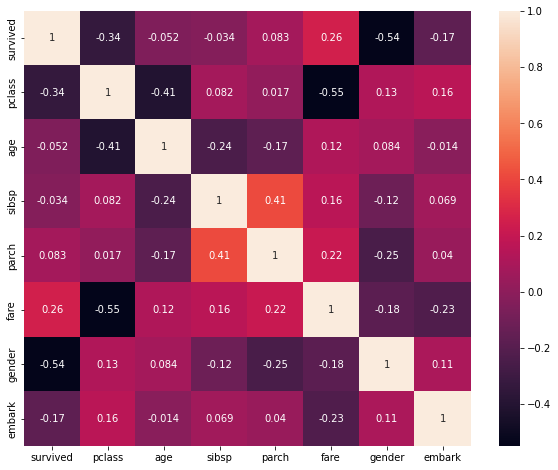

In [28]:
# correlation
plt.figure(figsize = (10, 8))
correlations = sns.heatmap(df_train.corr(), annot = True)
correlations;

## Variance Inflation Factor(VIF)

In [90]:
# # compute VIF and drop one of the variables whose VIF > 5
# pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

## Modelling

### 1).80 - 20  split set

In [30]:
# Splitting our dataset
#
X = df_train.drop("survived",axis=1)
y = df_train["survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=25)

In [31]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Fitting our model
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [34]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('.......confusion matrix.............')
print(confusion_matrix(y_test, y_pred))
print('.............classification_report.....................')
print(classification_report(y_test, y_pred))
print('.............accuracy.......................')
print(accuracy_score(y_test, y_pred))

.......confusion matrix.............
[[90 18]
 [23 47]]
.............classification_report.....................
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       108
           1       0.72      0.67      0.70        70

    accuracy                           0.77       178
   macro avg       0.76      0.75      0.76       178
weighted avg       0.77      0.77      0.77       178

.............accuracy.......................
0.7696629213483146


Our first model achieved an accuracy of ~ 76.9%

Let's try the second model wiyth a different split size

### 2). 70 - 30 split set

In [35]:
# we will be using the same splits(x, y) above except for the split size, we're using 70-30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [36]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Fitting our model
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [39]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('.......confusion matrix.............')
print(confusion_matrix(y_test, y_pred))
print('...............classification_report....................')
print(classification_report(y_test, y_pred))
print('...........accuracy......................')
print(accuracy_score(y_test, y_pred))

.......confusion matrix.............
[[141  23]
 [ 32  71]]
...............classification_report....................
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       164
           1       0.76      0.69      0.72       103

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267

...........accuracy......................
0.7940074906367042


For the second model, keeping everything constant except for the split size, the accuracy slightly increases, from 76.97% to 79.40%.

Let's try for 60-40 and see

### 3). 60-40 split size

In [40]:
# we will be using the same splits(x, y) above except for the split size, we're using 70-30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state=25)

# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fitting our model
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('.......confusion matrix.............')
print(confusion_matrix(y_test, y_pred))
print('................................................')
print(classification_report(y_test, y_pred))
print('............accuracy.......................')
print(accuracy_score(y_test, y_pred))

.......confusion matrix.............
[[188  24]
 [ 49  95]]
................................................
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       212
           1       0.80      0.66      0.72       144

    accuracy                           0.79       356
   macro avg       0.80      0.77      0.78       356
weighted avg       0.80      0.79      0.79       356

............accuracy.......................
0.7949438202247191


The accuracy slightly increases from 79.40% to 79.49%.

This could be a sign of overfitting though!

## Optimization
### Linear Discriminant Analysis(LDA)

In [78]:
# Splitting our dataset
#
X = df_train.drop("survived",axis=1)
y = df_train["survived"]

In [79]:
# Step 4: The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [80]:
# Feature scaling
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
# perform LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#we set the n_components to 1, since we first want to check the performance 
# of our classifier with a single linear discriminant.
lda = LDA(n_components=1)

# execute the fit and transform methods to actually retrieve the linear discriminants.
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

Our labels contain only two classes, so the maximum number of components can only be 2-1 = 1. 

In [82]:
# training and making predictions
#  We will use the KNN classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)  

y_pred = classifier.predict(X_test)

In [83]:
# evaluate the performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[98 13]
 [24 43]]
Accuracy0.7921348314606742


## Conclusion

Our model performance after optimization improved by quite a small range.However, it's an improvement of the initial model, hence we achieved our success.

Before optimization, the the accuracy was at 76.9%, and after optimizing it we achieve an accuracy of 79.2%. This was achieved when using test split 0f 80-20. Even though the model's performance was increasing with increase in the size of the test sample, it would have been as a result of overfitting.

Hence, we go with the 80-20 split, since it is best to have a larger set of data to train the model compared to the test set.